# Walmart Sales Prediction

**Business Context**:
The objective is predicting store sales using historicalmarkdown data.
One challenge of modelling retail data is the need to make decisions based on limited
history. If Christmas comes but once a year, so does the chance to see how strategic
decisions impacted the bottom line.

**Data Availability & Business Problem:**
You are provided with historical sales data for 45 Walmart stores located in different
regions. Each store contains a number of departments, and you are tasked with predicting
the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year.
These markdowns precede prominent holidays, the four largest of which are the Super
Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are
weighted five times higherin the evaluation than non-holiday weeks. Part of the challenge
presented by this competition is modelling the effects of markdowns on these holiday
weeks in the absence of complete/ideal historical data.

* **stores.csv**: This file contains anonymized information about the 45 stores, indicating the type and size of store.
* **train.csv**: This is the historical training data, which covers to 2010-02-05 to 2012-11-01

**stores.csv** - Within this file you will find the following fields:
* **Store** - the store number
* **Dept** - the department number
* **Date** - the week
* **Weekly_Sales** - sales for the given department in the given store
* **IsHoliday** - whether the week is a special holiday week

**test.csv** - This file is identical to train.csv, except we have withheld the weekly sales.

You must predict the sales for each triplet of store, department, and date in this file.

**features.csv**: This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:
* **Store** - the store number
* **Date** - the week
* **Temperature** - average temperature in the region
* **Fuel_Price** - cost of fuel in the region
* **MarkDown1-5** - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
* **CPI** - the consumer price index
* **Unemployment** - the unemployment rate
* **IsHoliday** - whether the week is a special holiday week

For convenience, the four holidays fall within the following weeks in the dataset (not all
holidays are in the data):
* **Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
* **Labor Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
* **Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
* **Christmas**: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

# Data Pre-processing

**Importing necessary Liberaries**

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
stores = pd.read_csv('stores.csv')

In [25]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [26]:
stores['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [27]:
features = pd.read_csv('features.csv')

In [28]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [29]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [30]:
features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8185,4842.29,975.03,3.00,2449.97,3169.69
8186,9090.48,2268.58,582.74,5797.47,1514.93
8187,3789.94,1827.31,85.72,744.84,2150.36
8188,2961.49,1047.07,204.19,363.00,1059.46


In [31]:
test = pd.read_csv('test.csv')

In [32]:
train = pd.read_csv('train.csv')

In [33]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [34]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [35]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

## Replace NaN values in Markdown columns with Zero

In [43]:
features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

In [44]:
features.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

## Replacing NaN values in 'CPI' and 'Unemployment' Columns with their respective mean

In [45]:
features['CPI'].fillna(features['CPI'].mean(), inplace=True)

In [46]:
features['Unemployment'].fillna(features['Unemployment'].mean(), inplace=True)

## Check again for NaN values

In [47]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [48]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [49]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [50]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [51]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True


In [52]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


## Merging all the features with training data

In [53]:
merge1 = pd.merge(stores, features, how='inner', on='Store')

In [54]:
df_merged = pd.merge(merge1, train, how='inner', on=['Store', 'Date', 'IsHoliday'])

## Merging all the features with testing data

In [65]:
df_merged_test = pd.merge(merge1, test, how='inner', on=['Store', 'Date', 'IsHoliday'])

In [55]:
df_merged.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38


## Sorting the dataframe by Date

In [56]:
df_merged = df_merged.sort_values('Date')

In [57]:
df_merged

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50
330761,35,B,103681,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,3,14612.19
330762,35,B,103681,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,4,26323.15
330763,35,B,103681,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,5,36414.63
330764,35,B,103681,2010-02-05,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,6,11437.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128051,13,A,219622,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,49,7770.71
128052,13,A,219622,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,50,1486.00
128053,13,A,219622,2012-10-26,46.97,3.755,10192.49,364.57,150.0,1714.15,5563.92,131.193097,5.621,False,52,4738.93
390991,41,A,196321,2012-10-26,41.80,3.686,4864.30,101.34,250.6,47.24,1524.43,199.219532,6.195,False,4,32699.78


# EDA

## Pie Chart

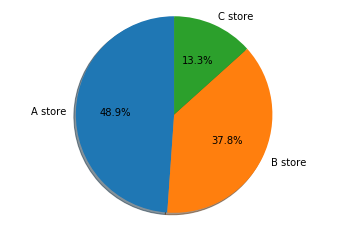

In [58]:
labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## Boxplot for sizes of types of stores

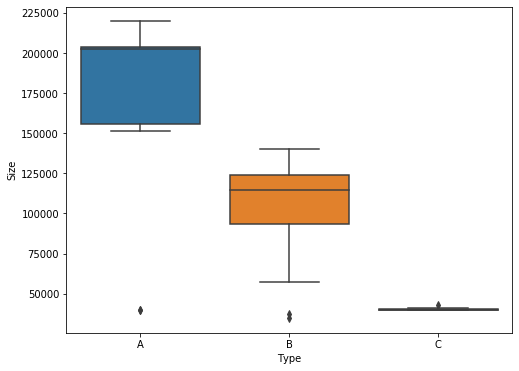

In [59]:
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

## Boxplot for weekly sales for different types of stores

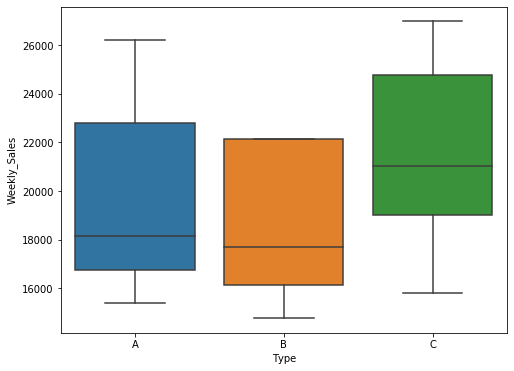

In [60]:
store_sale = pd.concat([stores['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

### Total count of sales on holidays and non holidays

In [61]:
print('Sales on Non-Holiday : ',train[train['IsHoliday']==False]['Weekly_Sales'].count())
print('Sales on Holiday : ',train[train['IsHoliday']==True]['Weekly_Sales'].count())

Sales on Non-Holiday :  391909
Sales on Holiday :  29661


### Boxplot for holiday and non holiday sales

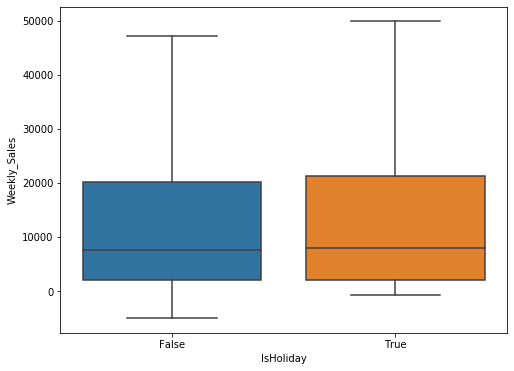

In [62]:
store_holiday = pd.concat([train['IsHoliday'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=store_holiday, showfliers=False)

# Bivariate Analysis

## Plotting correlation between all important features

[]

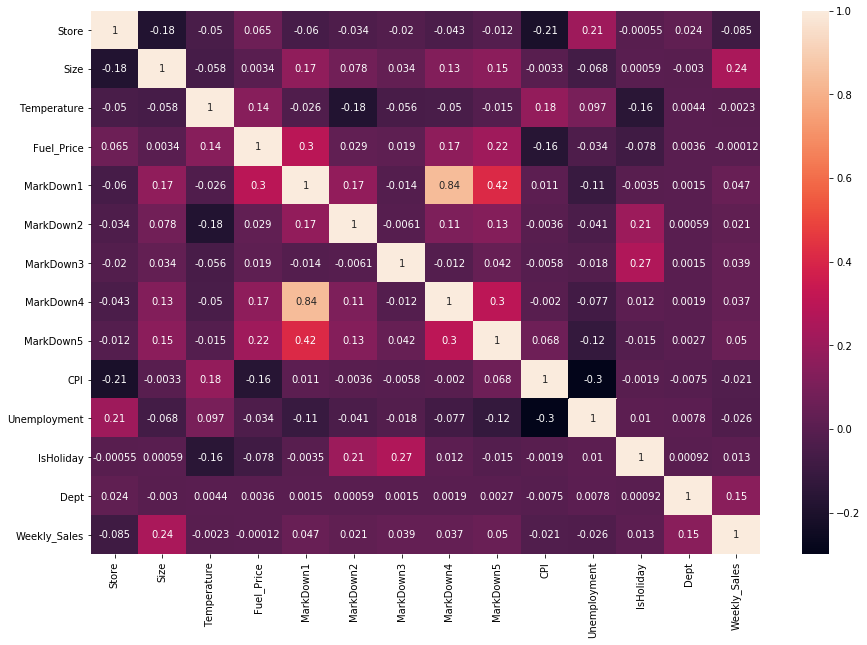

In [63]:
corr = df_merged.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [64]:
df_merged['Date'].dtypes

dtype('O')

## Adding column for year

In [66]:
df_merged["Year"] = pd.to_datetime(df_merged["Date"], format="%Y-%m-%d").dt.year
df_merged_test["Year"] = pd.to_datetime(df_merged_test["Date"], format="%Y-%m-%d").dt.year

## Adding column for day

In [67]:
df_merged["Day"] = pd.to_datetime(df_merged["Date"], format="%Y-%m-%d").dt.day
df_merged_test["Day"] = pd.to_datetime(df_merged_test["Date"], format="%Y-%m-%d").dt.day

## Adding column for Superbowl

In [80]:
df_merged['Superbowl'] = df_merged['Date'].apply(lambda x: 1 if x in ['2010-02-12','2011-02-11','2012-02-10','2013-02-08'] else 0)
df_merged_test['Superbowl'] = df_merged_test['Date'].apply(lambda x: 1 if x in ['2010-02-12','2011-02-11','2012-02-10','2013-02-08'] else 0)

## Adding column for Labor Day

In [81]:
df_merged['Labor Day'] = df_merged['Date'].apply(lambda x: 1 if x in ['2010-09-10','2011-09-09','2012-09-07','2013-09-06'] else 0)
df_merged_test['Labor Day'] = df_merged_test['Date'].apply(lambda x: 1 if x in ['2010-09-10','2011-09-09','2012-09-07','2013-09-06'] else 0)

## Adding column for Thanksgiving

In [82]:
df_merged['Thanksgiving'] = df_merged['Date'].apply(lambda x: 1 if x in ['2010-11-26','2011-02-25','2012-11-23','2013-11-29'] else 0)
df_merged_test['Thanksgiving'] = df_merged_test['Date'].apply(lambda x: 1 if x in ['2010-11-26','2011-02-25','2012-11-23','2013-11-29'] else 0)

## Adding column for Christmas

In [83]:
df_merged['Christmas'] = df_merged['Date'].apply(lambda x: 1 if x in ['2010-12-31','2011-12-30','2012-12-28','2013-12-27'] else 0)
df_merged_test['Christmas'] = df_merged['Date'].apply(lambda x: 1 if x in ['2010-12-31','2011-12-30','2012-12-28','2013-12-27'] else 0)

In [95]:
df_merged.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Dept,Weekly_Sales,Year,Day,Superbowl,Labor Day,Thanksgiving,Christmas,week,Quarter
0,1,A,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,...,1,24924.50,2010,5,0,0,0,0,5,1
330761,35,B,103681,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,...,3,14612.19,2010,5,0,0,0,0,5,1
330762,35,B,103681,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,...,4,26323.15,2010,5,0,0,0,0,5,1
330763,35,B,103681,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,...,5,36414.63,2010,5,0,0,0,0,5,1
330764,35,B,103681,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,...,6,11437.81,2010,5,0,0,0,0,5,1


## Adding column for week

In [92]:
df_merged['week'] = pd.DatetimeIndex(df_merged['Date']).week
df_merged_test['week'] = pd.DatetimeIndex(df_merged_test['Date']).week

## Adding column for Quarter

In [93]:
df_merged['Quarter'] = pd.DatetimeIndex(df_merged['Date']).quarter
df_merged_test['Quarter'] = pd.DatetimeIndex(df_merged_test['Date']).quarter

# Splitting Store type into categorical features

### get_dummies() takes dataframe as input and the column you want to make dummies from. It returns a dataframe with dummies minus original column passed in this function.

In [96]:
def get_dummies(df, col):
    dummies = pd.get_dummies(df[col], prefix = col, drop_first = True)
    df = pd.concat([df, dummies], axis = 1)
    df.drop(col, axis = 1, inplace = True )
    return df

In [97]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
 16  Year          421570 non-null  int64  
 17  Day           421570 non-null  int64  
 18  Supe

### From above we can see Type is of object type

In [104]:
df_merged['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

### Getting Dummies for 'Type' column

In [105]:
df_hot = get_dummies(df_merged, 'Type')
df_hot_test = get_dummies(df_merged_test, 'Type')

In [107]:
df_hot.head()

,Store,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Year,Day,Superbowl,Labor Day,Thanksgiving,Christmas,week,Quarter,Type_B,Type_C
0,1,151315,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,2010,5,0,0,0,0,5,1,0,0
330761,35,103681,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,...,2010,5,0,0,0,0,5,1,1,0
330762,35,103681,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,...,2010,5,0,0,0,0,5,1,1,0
330763,35,103681,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,...,2010,5,0,0,0,0,5,1,1,0
330764,35,103681,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,...,2010,5,0,0,0,0,5,1,1,0


### Describing the Data

In [110]:
df_hot[['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size','Weekly_Sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.00000,425.290000,67474.850000
MarkDown5,421570.0,1662.772385,4207.629321,0.000,0.000000,0.00000,2168.040000,108519.280000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000


## Outlier Treatment

**Outlier treatment on selected numerical variables**

In [116]:
df_hot[['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size','Weekly_Sales']] = df_hot[['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size','Weekly_Sales']].apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))
df_hot_test[['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']] = df_hot_test[['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']].apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))

## Train Test Split

In [122]:
from sklearn.model_selection import train_test_split

In [126]:
X = df_hot.drop(['Weekly_Sales', 'Date'], axis=1)
y = df_hot['Weekly_Sales']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

# Standard Scaler

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
sc_X = StandardScaler()

In [130]:
X_train = sc_X.fit_transform(X_train)

In [131]:
X_test = sc_X.fit_transform(X_test)

# Linear Regression

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lm = LinearRegression()

In [134]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Checking test score

In [135]:
lm.score(X_test, y_test)

0.09376530292729424

### Checking training score

In [136]:
lm.score(X_train, y_train)

0.09394229535293319

In [138]:
y_pred_lm = lm.predict(X_test)

## Scatter Plot between target and predicted target

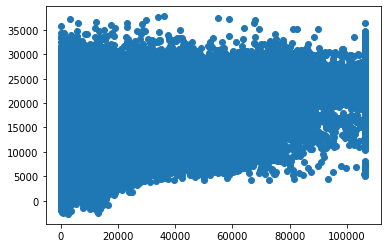

In [174]:
plt.scatter(y_test, y_pred_lm)

# Metrics

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [143]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lm)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_lm)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_lm))}')

Mean Absolute Error: 14130.673572597903
Mean Squared Error: 395454297.207144
Root Mean Squared Error: 19886.03271663667


### Comparison between Actual and Predicted Variable

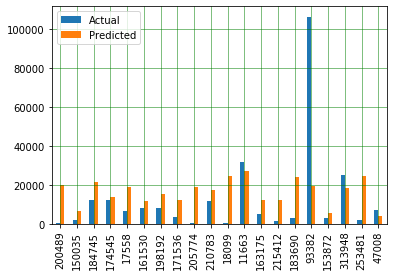

In [146]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lm})
df1.sample(20).plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Decision Tree

In [147]:
from sklearn.tree import DecisionTreeRegressor

In [148]:
tree = DecisionTreeRegressor()

In [150]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [151]:
y_pred_tree = tree.predict(X_test)

## Scatter Plot between target and predicted target

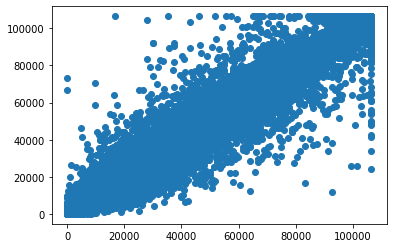

In [175]:
plt.scatter(y_test, y_pred_tree)

### Comparison between Actual and Predicted Variable

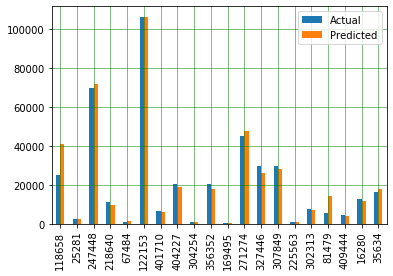

In [152]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tree})
df2.sample(20).plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Checking training score of Decision Tree Regressor

In [153]:
tree.score(X_train, y_train)

1.0

### Checking test score of Decision Tree Regressor

In [154]:
tree.score(X_test, y_test)

0.96711512763515

## Metrics

In [155]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred_tree)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_tree)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_tree))}')

Mean Absolute Error: 1703.815473388556
Mean Squared Error: 14349995.792254545
Root Mean Squared Error: 3788.1388295909305


# Final Predictions on the test set using Decision Tree Regressor

In [163]:
df_hot_test.drop('Date', axis=1, inplace=True)

In [165]:
test['Predicted Weekly Sales'] = tree.predict(df_hot_test)

In [172]:
test.sample(10)

,Store,Dept,Date,IsHoliday,Predicted Weekly Sales
2751,1,98,2013-06-21,False,1310.00
49647,19,37,2013-03-08,False,29146.57
57860,22,38,2013-02-15,False,1595.00
13178,5,95,2012-11-02,False,5300.00
93246,36,20,2012-12-07,False,1310.00
85969,33,13,2012-12-28,True,90.06
13072,5,90,2013-04-26,False,5300.00
105478,41,52,2013-01-11,False,5300.00
99735,39,40,2012-11-23,True,1595.00
1003,1,27,2013-07-05,False,5300.00


In [173]:
%cd C:\\Users\\Abhishek\\Advance Projects\\Walmart Sales
test.to_csv('Predictions_Walmart_test_set.csv',index=False)

C:\Users\Abhishek\Advance Projects\Walmart Sales
